In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
#from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
import itertools 
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
import tensorflow.keras as K

from keras.models import *
import tensorflow as tf
from tensorflow.keras import Model
import gc
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/My/EEG/Data/'

X_train = np.load(path + "x_train.npy")


X_test = np.load(path + "x_test.npy")



y_train = np.load(path + "y_train2.npy")


y_test = np.load(path + "y_test2.npy")

print("X",X_train.shape,X_test.shape)

print("y",y_train.shape,y_test.shape)

X (36000, 125, 125, 1) (12000, 125, 125, 1)
y (36000, 10) (12000, 10)


In [3]:
kernel_init = keras.initializers.he_uniform(seed=1369)
kernel_reg = kernel_regularizer=keras.regularizers.l2(0.000114)

input = keras.Input(shape = (125,125,1),batch_size=(500))
x = layers.Conv2D(kernel_size=(4,4),strides=(2,2),filters=32,activation="relu",
                        kernel_initializer=kernel_init,kernel_regularizer=kernel_reg,padding="same",name="layer1")(input)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(kernel_size=(4,4),strides=(2,2),filters=64,activation="relu",
                        kernel_initializer=kernel_init,kernel_regularizer=kernel_reg,padding="same",name="layer2")(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(kernel_size=(4,4),strides=(2,2),filters=128,activation="relu",
                        kernel_initializer=kernel_init,kernel_regularizer=kernel_reg,padding="same",name="layer3")(x)

x = layers.BatchNormalization()(x)
x = layers.GlobalAveragePooling2D(data_format='channels_last')(x)
x = layers.Dense(100,activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(10, activation="softmax")(x)
model = keras.Model(input, x, name="model")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(500, 125, 125, 1)]      0         
                                                                 
 layer1 (Conv2D)             (500, 63, 63, 32)         544       
                                                                 
 batch_normalization (BatchN  (500, 63, 63, 32)        128       
 ormalization)                                                   
                                                                 
 layer2 (Conv2D)             (500, 32, 32, 64)         32832     
                                                                 
 batch_normalization_1 (Batc  (500, 32, 32, 64)        256       
 hNormalization)                                                 
                                                                 
 layer3 (Conv2D)             (500, 16, 16, 128)        131200

In [4]:
opt = keras.optimizers.Adam(learning_rate=0.009)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['categorical_accuracy'])
history = model.fit(X_train,y_train,epochs=200,batch_size=500,validation_data=(X_test,y_test))

Epoch 1/200
72/72 [==============================] - 8s 74ms/step - loss: 2.4346 - categorical_accuracy: 0.1209 - val_loss: 3.6705 - val_categorical_accuracy: 0.1013
Epoch 2/200
72/72 [==============================] - 4s 60ms/step - loss: 2.3412 - categorical_accuracy: 0.1452 - val_loss: 2.4166 - val_categorical_accuracy: 0.1067
Epoch 3/200
72/72 [==============================] - 4s 60ms/step - loss: 2.1761 - categorical_accuracy: 0.2230 - val_loss: 2.9556 - val_categorical_accuracy: 0.1021
Epoch 4/200
72/72 [==============================] - 4s 60ms/step - loss: 1.6504 - categorical_accuracy: 0.4347 - val_loss: 4.9280 - val_categorical_accuracy: 0.1136
Epoch 5/200
72/72 [==============================] - 4s 61ms/step - loss: 1.0158 - categorical_accuracy: 0.6827 - val_loss: 3.7624 - val_categorical_accuracy: 0.2243
Epoch 6/200
72/72 [==============================] - 4s 60ms/step - loss: 0.6982 - categorical_accuracy: 0.8049 - val_loss: 2.6486 - val_categorical_accuracy: 0.3618
Epoc

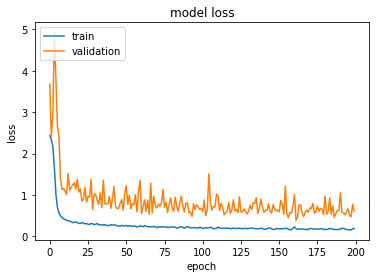

In [5]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [6]:
# predict probabilities for test set
y_pred = model.predict(X_test)
# predict crisp classes for test set
yhat_classes = np.argmax(model.predict(X_test), axis=-1)
# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes.flatten()
y_test = np.argmax(y_test, axis=-1)
y_test = y_test.flatten()

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes, average='weighted')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, y_pred,multi_class='ovr', average='weighted')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.883833
Precision: 0.885275
Recall: 0.883833
F1 score: 0.883765
Cohens kappa: 0.870926
ROC AUC: 0.992336
[[ 984   15   16   57   14   13   39   45    9    8]
 [   1 1113    1    3   10   13   31    6    9   13]
 [   4   28 1065   10    7   39   21    3   20    3]
 [   6    3    9 1085    3   24    6   15   31   18]
 [   4   14   31    4 1097    8    6   12    4   20]
 [   2   11   17    5   38 1066    6    9   32   14]
 [   9   33   21    0    3   14 1040    8   20   52]
 [   0    7   15   54   34   19   22 1039    3    7]
 [   0   31   23   16   43   14   11    7 1040   15]
 [  10   14    3   21    9    7   24   28    7 1077]]


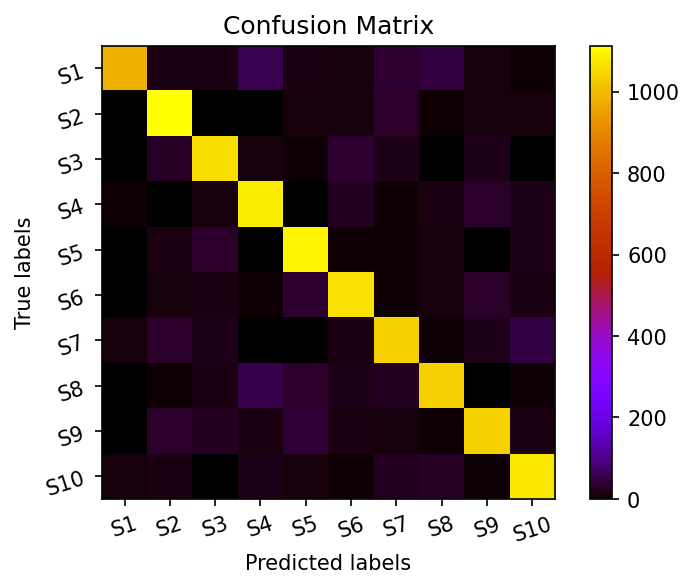

In [8]:
import matplotlib.ticker as ticker
plt.figure(dpi=150)

plt.imshow(matrix,cmap='gnuplot',extent=[0,10,0,10])

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5], ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10'],rotation=18)
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5], ['S10','S9','S8','S7','S6','S5','S4','S3','S2','S1'],rotation=18)

plt.title('Confusion Matrix')
plt.colorbar()
plt.show()